In [1]:
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [3]:
suncushion_df = pd.read_csv("./crawling/data/suncushion_review_token.csv",encoding ="utf-8")
sunstick_df = pd.read_csv("./crawling/data/sunstick_review_token.csv", encoding = "utf-8")

In [4]:
tqdm.pandas()
suncushion_df["star"] = suncushion_df["star"].progress_apply(lambda x: int(x.split(" ")[1][0]))
sunstick_df["star"] = sunstick_df["star"].progress_apply(lambda x: int(x.split(" ")[1][0]))

  0%|          | 0/14358 [00:00<?, ?it/s]

  0%|          | 0/25743 [00:00<?, ?it/s]

# TOP 10

In [5]:
tqdm.pandas()
suncushion_df['tokens'] = suncushion_df['tokens'].progress_apply(lambda x: eval(x))

  0%|          | 0/14358 [00:00<?, ?it/s]

In [6]:
sunstick_df['tokens'] = sunstick_df['tokens'].progress_apply(lambda x: eval(x))

  0%|          | 0/25743 [00:00<?, ?it/s]

## 선쿠션 평균 평점 top 10 워드클라우드

In [7]:
word_count_dict_suncushion_top10 = defaultdict(Counter)

In [8]:
suncushion_top10_product_list = ["[스티커 증정]그린핑거 포레스트 멀티 디펜스 선쿠션 산리오 에디션 2종(시나모롤/헬로키티)",
                      '[NEW] 아떼 속광 톤업 선쿠션 SPF50+/PA++++',
                      "[NEW/민감진정]AGE20S 선 에센스 팩트 무기자차 카밍 롱 프로텍션 12.5g (본품+리필)",
                      "[오롤리콜라보]AGE20S 선 에센스팩트 카밍 롱 프로텍션 12.5g*2 (+파우치, 스티커 증정)",
                      "[파데프리/프롬젤라PICK] 톤핏선 비건 핑베 톤업 선쿠션 SPF50+ PA++++",
                      "식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)",
                      "식물나라 뽀얀쌀 생기 톤업 선 쿠션 단품(01 뽀얀 화이트/02생기 피치)",
                      "[1+1][간편밀착] 달바 워터풀 톤업 선 쿠션 듀오 기획(15g+15g)",
                      "[NEW] 브링그린 티트리시카톤업선쿠션 리필기획(배스킨콜라보)",
                      "브링그린 티트리시카톤업선쿠션 15g_NEW"]

In [9]:
def suncushion_count_words(df):
    for product in suncushion_top10_product_list:
        filter_df = suncushion_df[suncushion_df['product_name'] == product]
        for token in filter_df['tokens']:
            c = Counter([x for x in token])
            word_count_dict_suncushion_top10[product] += c

In [10]:
suncushion_count_words(suncushion_df)

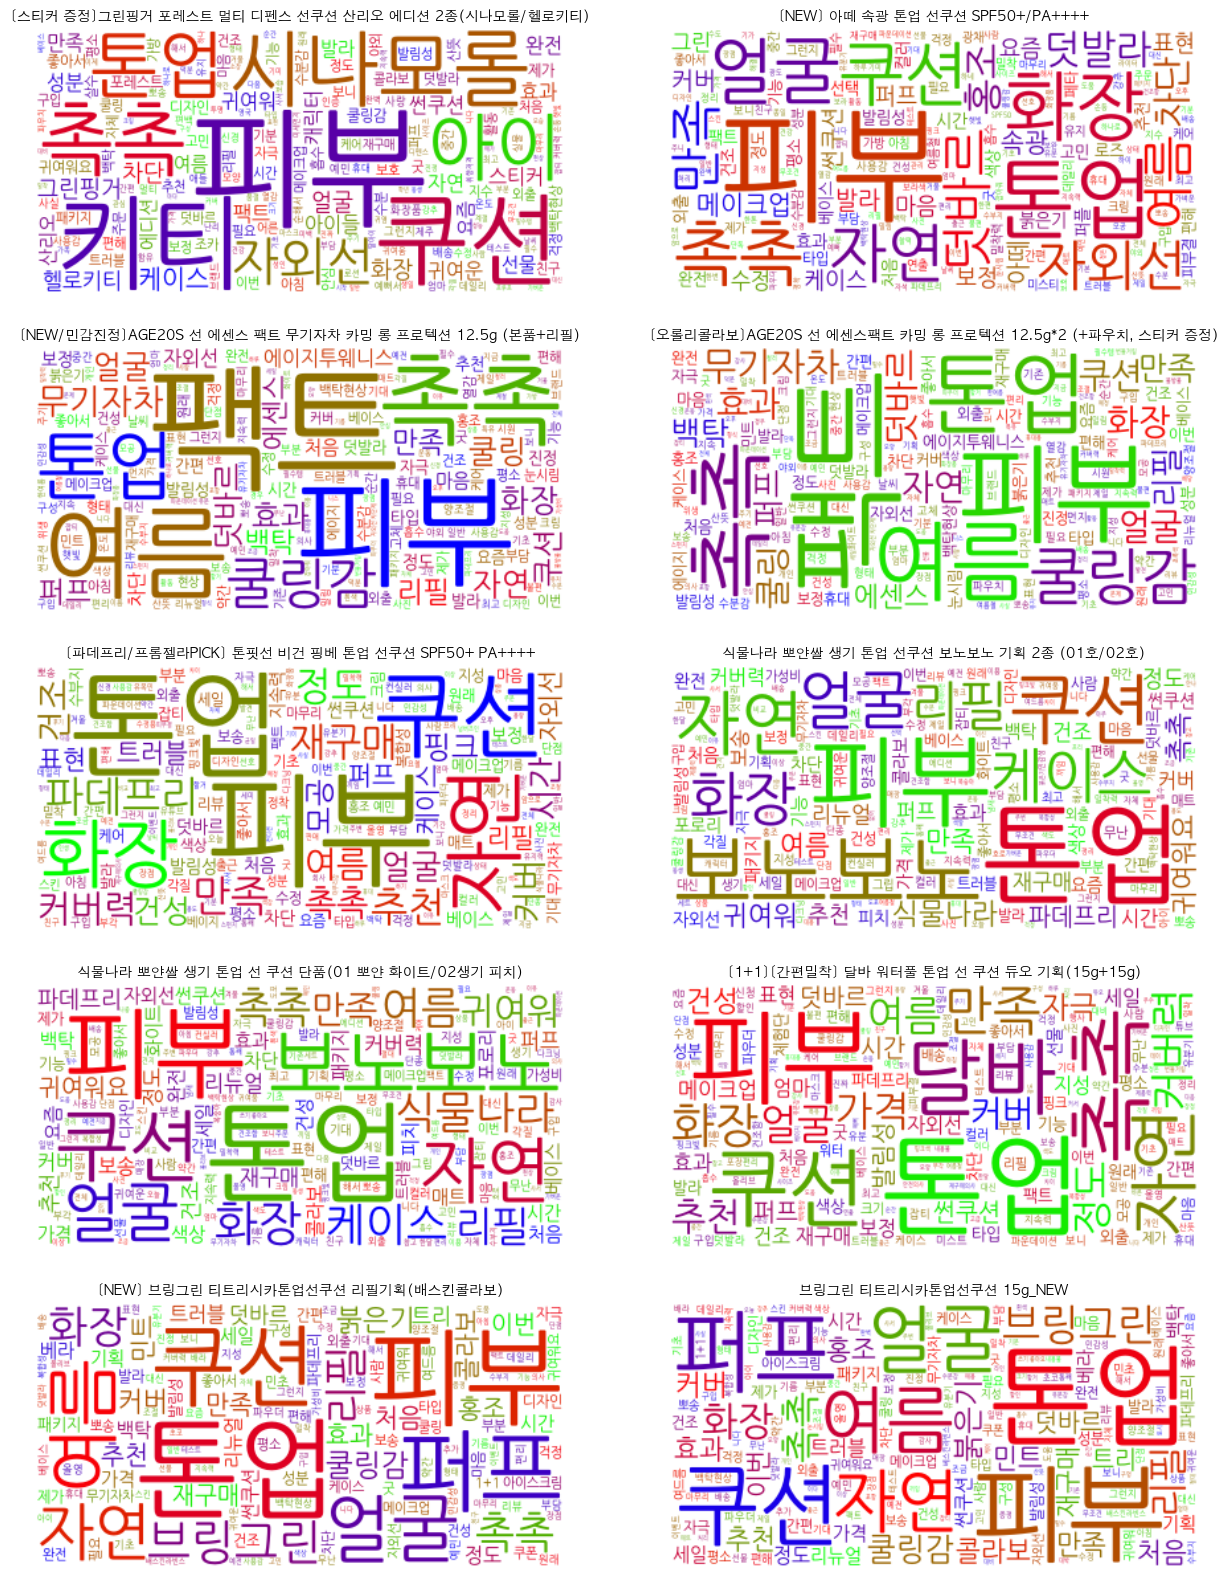

In [15]:
# 서브플롯 레이아웃 설정 (2x5 레이아웃)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# 각 제품에 대한 워드 클라우드 생성 및 서브플롯에 배치
for i, product in enumerate(suncushion_top10_product_list):
    ax = axes[i // 2, i % 2]
    word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
    ).generate_from_frequencies(word_count_dict_suncushion_top10[product])
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(product, fontsize=10)  # 제목을 너무 길지 않게 표시

## 선스틱 평균 평점 top 10 워드클라우드

In [16]:
word_count_dict_sunstick_top10 = defaultdict(Counter)

In [17]:
sunstick_top10_product_list = [
    "[워터프루프/김고은 PICK] 가히 에어리 핏 선스틱 14g",
    "[안선영 Pick] 딘시 프리미엄 비건 3 in 1 선스틱 SPF50+ PA++++ 10.5g",
    "로우퀘스트 에키네시아 에어리 선스틱 19g",
    "[NEW/3초열진정] 토코보 시카 쿨링 선스틱 18g SPF50+ PA++++",
    "라로제 클린 선스틱 SPF 50 PA++++ 18.5g (워터프루프)",
    "[보송매트]토코보 코튼 소프트 선스틱 19g SPF50+ PA++++",
    "[워터프루프/백송민PICK] 톤핏선 비건 노세범 프라이머 선스틱 SPF50+ PA++++",
    "[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g",
    "[즉각쿨링] 라운드랩 자작나무 수분 선스틱 19g 더블 기획",
    "[급속쿨링]라운드어라운드 컴포트 그린티 에어 선스틱 증정기획(+뽀득폼30ml증정)"
]

In [18]:
def sunstick_count_words(df):
    for product in sunstick_top10_product_list:
        filter_df = sunstick_df[sunstick_df['product_name'] == product]
        for token in filter_df['tokens']:
            c = Counter([x for x in token])
            word_count_dict_sunstick_top10[product] += c

In [19]:
sunstick_count_words(sunstick_df)

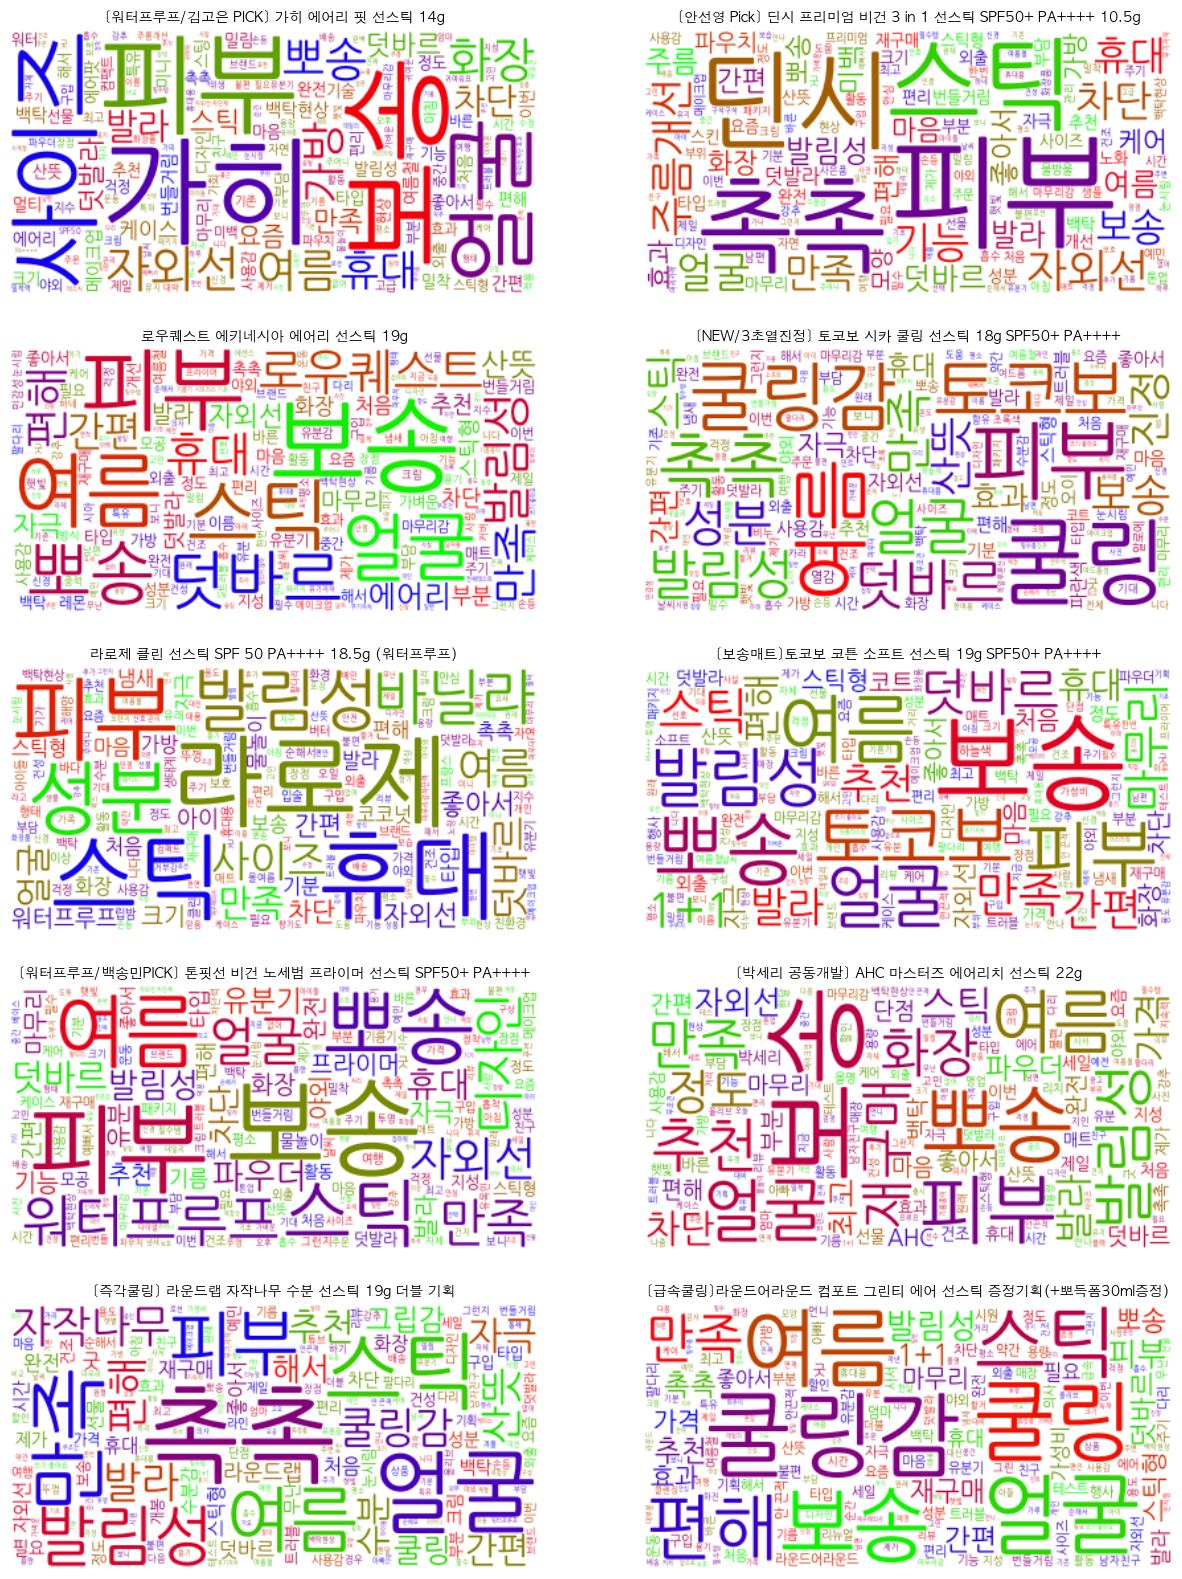

In [20]:
# 서브플롯 레이아웃 설정 (2x5 레이아웃)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# 각 제품에 대한 워드 클라우드 생성 및 서브플롯에 배치
for i, product in enumerate(sunstick_top10_product_list):
    ax = axes[i // 2, i % 2]
    word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
    ).generate_from_frequencies(word_count_dict_sunstick_top10[product])
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(product, fontsize=10)  # 제목을 너무 길지 않게 표시

# LOWER 10

In [21]:
scu_low_rate_df = suncushion_df[suncushion_df["star"] <= 3]
scu_low_rate_df = scu_low_rate_df.reset_index()

In [22]:
scu_low_rate_df

index  page                             product_name  star  \
0         3     1  식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)     1   
1         8     1  식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)     1   
2        52     6  식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)     2   
3        56     6  식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)     3   
4        79     8  식물나라 뽀얀쌀 생기 톤업 선쿠션 보노보노 기획 2종 (01호/02호)     1   
...     ...   ...                                      ...   ...   
1158  14331    29   김정문알로에 큐어 아쿠아 마일드 쿨링 선쿠션 리필 기획(25g+리필)     3   
1159  14344    30   김정문알로에 큐어 아쿠아 마일드 쿨링 선쿠션 리필 기획(25g+리필)     3   
1160  14346    31   김정문알로에 큐어 아쿠아 마일드 쿨링 선쿠션 리필 기획(25g+리필)     3   
1161  14351    31   김정문알로에 큐어 아쿠아 마일드 쿨링 선쿠션 리필 기획(25g+리필)     2   
1162  14357    32   김정문알로에 큐어 아쿠아 마일드 쿨링 선쿠션 리필 기획(25g+리필)     3   

                                                 review  \
0     피부가 예민한 편이긴한데 이거 바르고 얼굴이 울긋불긋해지고 가려워서 혼났네요ㅠ 끊고...   
1     이거 바르고 얼굴에 비립종도 생기고 얼굴이 울긋불긋해지고 가려워지더라구요.. 더이상...   
2     손에 테스트 해보고 샀는데 얼굴에 바르니 느낌이 완전 달라요. 손에는 적당히 톤업되...   
3                      자연스럽고 촉촉하게 발리는데 기름지진않아서 좋네용 ㅡ~~!   
4     상품은 마음에 드는데 배송은 진짜 최악완충제 하나도 없이 보내서 상자 다 찌그러지고...   
...                                                 ...   
1158  여름에 파데쿠션대신 이걸써보려고 샀어요. 괜찮으면 정착하려고합니다. 색이 보정이 되...   
1159                 자외선 차단 효과도 좋고 선쿠션이라서 간편하게 바를 수 있어요   
1160                      여름에도 각질이일어나는기적으로보았죠.. 엄청건조하네요   
1161        건성인 제피부에는 별로예요 지성피부에  추천합니다 생각보다 지속력이 떨어지네요   
1162  화장하고 썬크림 덧바를 용도로 샀는데 백탁이 너무 심해서 당황했습니다.수정화장용으로...   

                     skin_type brand    category  \
0                           []  식물나라  suncushion   
1                           []  식물나라  suncushion   
2                           []  식물나라  suncushion   
3                           []  식물나라  suncushion   
4     ['건성', '웜톤', '각질', '모공']  식물나라  suncushion   
...                        ...   ...         ...   
1158                        []    큐어  suncushion   
1159                        []    큐어  suncushion   
1160                        []    큐어  suncushion   
1161                        []    큐어  suncushion   
1162                        []    큐어  suncushion   

                                                 tokens  
0                                 [피부, 예민, 얼굴, 가려워, 피부]  
1                                [얼굴, 얼굴, 가려워, 이상, 패키지]  
2     [테스트, 얼굴, 완전, 톤업, 촉촉, 얼굴, 퍼프, 자외선, 차단, 문제, 밀착력...  
3                                      [자연, 촉촉, 기름, 지진]  
4                              [상품, 마음, 배송, 최악, 완충, 상자]  
...                                                 ...  
1158               [여름, 쿠션, 대신, 정착, 보정, 역할, 색도, 톤업, 기능]  
1159                                    [자외선 차단 효과, 간편]  
1160                                   [여름, 각질, 기적, 건조]  
1161                          [건성, 피부, 지성, 피부, 추천, 지속력]  
1162                      [화장, 덧바르, 용도, 백탁, 당황, 수정, 화장]  

[1163 rows x 9 columns]

In [23]:
sst_low_rate_df = sunstick_df[sunstick_df["star"] <= 3]
sst_low_rate_df = sst_low_rate_df.reset_index()

In [25]:
scu_dic = {}

for product in scu_low_rate_df["product_name"].unique():
    hap = 0
    hap += scu_low_rate_df[scu_low_rate_df["product_name"] == product]["star"].sum()
    scu_dic[product] = hap / len(scu_low_rate_df[scu_low_rate_df["product_name"] == product])

In [26]:
sst_dic = {}

for product in sst_low_rate_df["product_name"].unique():
    hap = 0
    hap += sst_low_rate_df[sst_low_rate_df["product_name"] == product]["star"].sum()
    sst_dic[product] = hap / len(sst_low_rate_df[sst_low_rate_df["product_name"] == product])

In [27]:
scu = sorted(scu_dic.items(), key = lambda x: x[1], reverse = False)

In [28]:
sst = sorted(sst_dic.items(), key = lambda x: x[1], reverse = False)

In [29]:
for name, rate in scu[:10]:
    print(name)

[쿨링자차] 달바 워터풀 프레쉬 선 쿠션 25g
[NEW/핑크톤업]AGE20S 글로우 핏 수분광 톤업 선팩트 12.5g (본품+리필)
[NEW] 라끌랑 슈퍼시카 톤업 선쿠션 24g
롬앤 백미 톤업 선 쿠션
[선착순선로션10g추가증정]궁중비책 모이스처 선쿠션 마일드 14g 리필기획 (+14g 리필)
[세븐틴 승관PICK] 그린핑거 포레스트 멀티디펜스 선쿠션 13g 본품/리필 택1
[배라콜라보] 브링그린 티트리시카 선 3종(선크림/선스틱/선쿠션)
[NEW] 브링그린 티트리시카톤업선쿠션 리필기획(배스킨콜라보)
브링그린 티트리시카톤업선쿠션 15g_NEW
[NEW] 아떼 속광 톤업 선쿠션 SPF50+/PA++++


In [30]:
for name, rate in sst[:10]:
    print(name)

[NEW] 정샘물 선슈얼 아이스 선스틱 16g
조선미녀 산들쑥선스틱 18g
AHC 마스터즈 카밍 워터풀 선스틱 22g
[NEW/모공커버] 닥터지 포어 블러 업 선 스틱 19g
정샘물 키즈 마일드 선 스틱 17g
닥터자르트 에브리선데이 선스틱 19g
[구성환PICK/씨프렌들리] 부쉬맨 워터프루프 서핑 선스틱 16g 기획 (+ 데일리 선크림 20ml)
[급속쿨링]라운드어라운드 컴포트 그린티 에어 선스틱 더블기획
[급속쿨링]라운드어라운드 컴포트 그린티 에어 선스틱 증정기획(+뽀득폼30ml증정)
[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g


## 선쿠션 평점 lower 10 워드클라우드

In [31]:
word_count_dict_suncushion_lower10 = defaultdict(Counter)

In [32]:
suncushion_lower10_product_list = ["[쿨링자차] 달바 워터풀 프레쉬 선 쿠션 25g",
                                   "[NEW/핑크톤업]AGE20S 글로우 핏 수분광 톤업 선팩트 12.5g (본품+리필)",
                                   "[NEW] 라끌랑 슈퍼시카 톤업 선쿠션 24g",
                                   "롬앤 백미 톤업 선 쿠션",
                                   "[선착순선로션10g추가증정]궁중비책 모이스처 선쿠션 마일드 14g 리필기획 (+14g 리필)",
                                   "[세븐틴 승관PICK] 그린핑거 포레스트 멀티디펜스 선쿠션 13g 본품/리필 택1",
                                   "[배라콜라보] 브링그린 티트리시카 선 3종(선크림/선스틱/선쿠션)",
                                   "[NEW] 브링그린 티트리시카톤업선쿠션 리필기획(배스킨콜라보)",
                                   "브링그린 티트리시카톤업선쿠션 15g_NEW",
                                   "[NEW] 아떼 속광 톤업 선쿠션 SPF50+/PA++++"]

In [33]:
def scu_lower_count_words(df):
    for product in suncushion_lower10_product_list:
        filter_df = scu_low_rate_df[scu_low_rate_df['product_name'] == product]
        for token in filter_df['tokens']:
            c = Counter([x for x in token])
            word_count_dict_suncushion_lower10[product] += c

In [34]:
scu_lower_count_words(scu_low_rate_df)

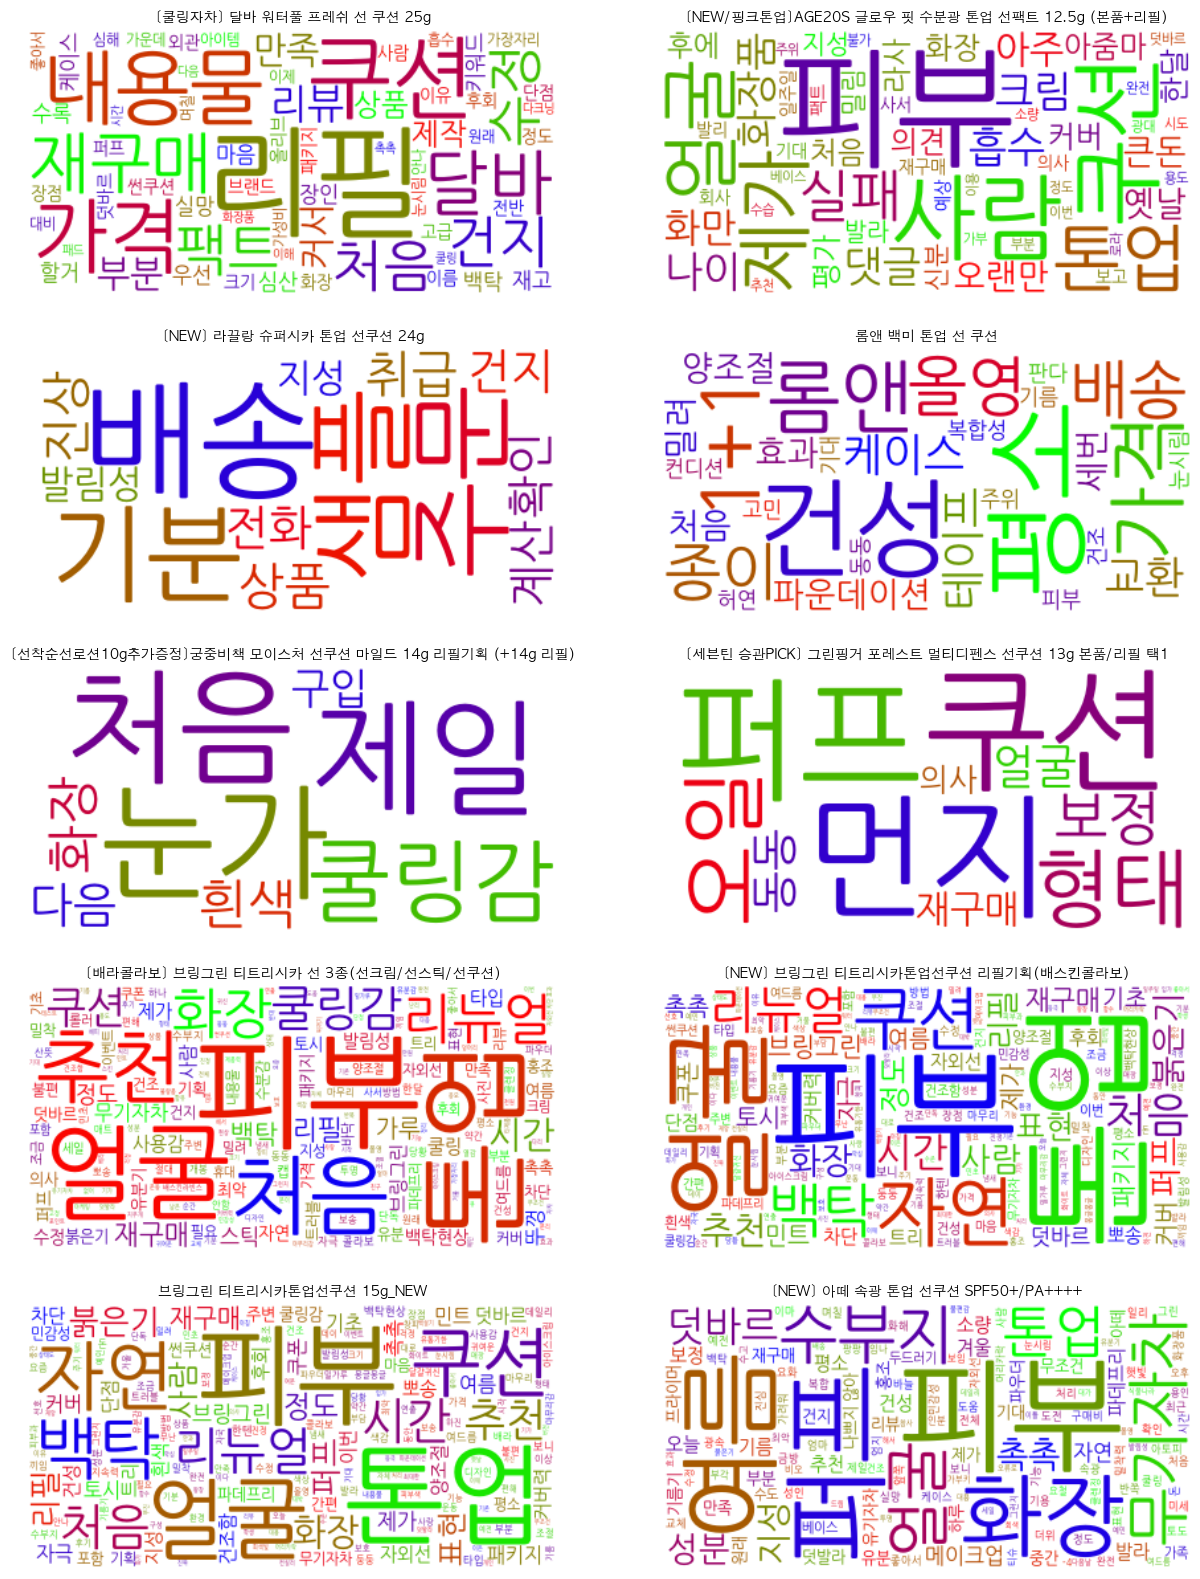

In [35]:
# 서브플롯 레이아웃 설정 (2x5 레이아웃)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# 각 제품에 대한 워드 클라우드 생성 및 서브플롯에 배치
for i, product in enumerate(suncushion_lower10_product_list):
    ax = axes[i // 2, i % 2]
    word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
    ).generate_from_frequencies(word_count_dict_suncushion_lower10[product])
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(product, fontsize=10)  # 제목을 너무 길지 않게 표시

## 선스틱 평점 lower 10 워드클라우드

In [36]:
word_count_dict_sunstick_lower10 = defaultdict(Counter)

In [37]:
sunstick_lower10_product_list = ["[NEW] 정샘물 선슈얼 아이스 선스틱 16g",
                                   "조선미녀 산들쑥선스틱 18g",
                                   "AHC 마스터즈 카밍 워터풀 선스틱 22g",
                                   "[NEW/모공커버] 닥터지 포어 블러 업 선 스틱 19g",
                                   "정샘물 키즈 마일드 선 스틱 17g",
                                   "닥터자르트 에브리선데이 선스틱 19g",
                                   "[구성환PICK/씨프렌들리] 부쉬맨 워터프루프 서핑 선스틱 16g 기획 (+ 데일리 선크림 20ml)",
                                   "[급속쿨링]라운드어라운드 컴포트 그린티 에어 선스틱 더블기획",
                                   "[급속쿨링]라운드어라운드 컴포트 그린티 에어 선스틱 증정기획(+뽀득폼30ml증정)",
                                   "[박세리 공동개발] AHC 마스터즈 에어리치 선스틱 22g"]

In [38]:
def sst_lower_count_words(df):
    for product in sunstick_lower10_product_list:
        filter_df = sst_low_rate_df[sst_low_rate_df['product_name'] == product]
        for token in filter_df['tokens']:
            c = Counter([x for x in token])
            word_count_dict_sunstick_lower10[product] += c

In [39]:
sst_lower_count_words(sst_low_rate_df)

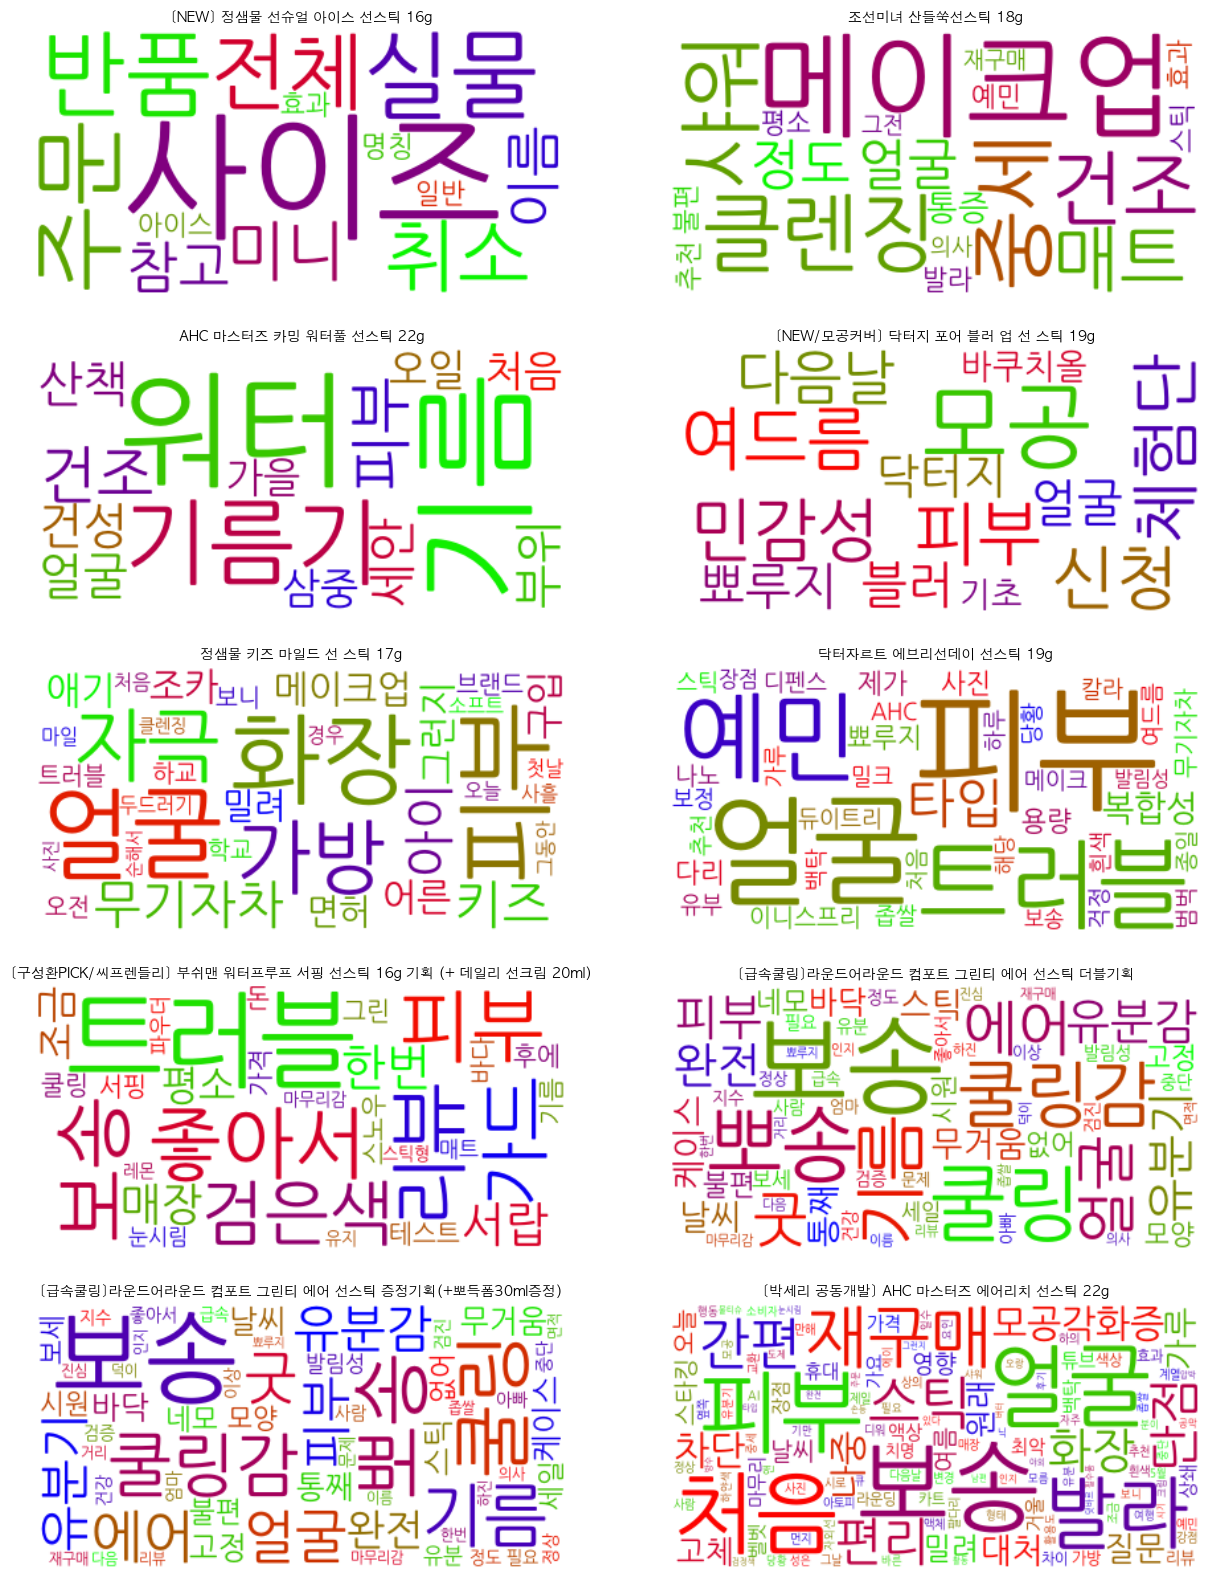

In [40]:
# 서브플롯 레이아웃 설정 (2x5 레이아웃)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# 각 제품에 대한 워드 클라우드 생성 및 서브플롯에 배치
for i, product in enumerate(sunstick_lower10_product_list):
    ax = axes[i // 2, i % 2]
    word_cloud = WordCloud(
    font_path = "/Library/Fonts/NanumGothic.otf",
    background_color="white",
    colormap="brg",
    ).generate_from_frequencies(word_count_dict_sunstick_lower10[product])
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(product, fontsize=10)  # 제목을 너무 길지 않게 표시